<a href="https://colab.research.google.com/github/phamngan828am/ueh25.nhom-botubaothu/blob/main/Final_essay_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import thư viện cần thiết**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**2. Tiền xử lý và chuẩn bị dữ liệu cho mô hình học máy**

In [ ]:
# 1. Tải dữ liệu
df = pd.read_excel("/content/drive/MyDrive/Data_Python_ST3/Final_data.xlsx")
display(df.head(10).style.background_gradient(cmap = "Purples_r"))
# Danh sách các thực thể không phải quốc gia (tổng hợp từ World Bank)
non_countries = [
    'Not classified', 'World', 'Africa Eastern and Southern',
    'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics',
    'Caribbean small states', 'East Asia & Pacific', 'Europe & Central Asia',
    'Euro area', 'European Union', 'Heavily indebted poor countries (HIPC)',
    'High income', 'Low income', 'Lower middle income', 'Low & middle income',
    'Latin America & Caribbean', 'Middle East & North Africa', 'North America',
    'OECD members', 'Other small states', 'Pacific island small states',
    'South Asia', 'Sub-Saharan Africa', 'Upper middle income'
]

df = df[~df['Country Name'].isin(non_countries)]
print(f"Số dòng sau khi lọc các thực thể tổng hợp: {len(df)}")

# 2. Xử lý Missing biến mục tiêu (biến 'IncomeGroup')
df.rename(columns={'IncomeGroup': 'Target'}, inplace=True)
df.dropna(subset=['Target'], inplace=True)
print(f"Số dòng sau khi lọc các nước không có Target: {len(df)}")

# 3. Tách Biến (Features 'X' và Target 'y')
# Giữ lại các cột để phân tích
country_info_cols = ['Country Name', 'Country Code']
target_col = 'Target'

# Lấy tất cả các cột số làm features
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# X là tất cả các cột số, y là cột Target
X = df[numeric_cols]
y = df[target_col]

# 4. Mã hóa Target (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# In ra các lớp để tham khảo
print("\nCác lớp của biến mục tiêu:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")

# 5. Tách dữ liệu Train-Test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 6. Tạo Pipeline cho Imputation và Scaling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit pipeline trên tập train và transform cả 2 tập
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.12/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Country Name,Country Code,Access to electricity (% of population),"Central government debt, total (% of GDP)",CO2 emissions (tCO2e per capita),Current health expenditure (%GDP),External debt stocks (% of GNI),FDI_net_inflows,GDP_growth(%annual),GDP_per_capita(current $US),Government expenditure on education (% of GDP),Individuals using the Internet (% of population),Infant mortality rate,Inflation,Investment,Life_expectancy,Renewable energy consumption (% of total final energy consumption),"School erollment, secondary (%gross)",Trade(%GDP),Unemployment_rate,urban_population(%population),IncomeGroup
0,Afghanistan,AFG,85.300000,nan,0.203552,23.088169,23.336849,nan,-6.240172,357.261153,nan,17.191700,52.000000,13.712102,16.668472,65.617000,20.000000,nan,72.885470,14.100000,26.616000,Low income
1,Aruba,ABW,99.900000,nan,4.684559,nan,nan,248150282.620000,8.517918,30559.533535,nan,nan,nan,nan,nan,76.226000,8.800000,131.802170,172.884172,nan,44.052000,High income
2,Africa Eastern and Southern,AFE,48.801258,nan,0.816361,5.727920,nan,21129349025.000000,3.555769,1628.318945,3.697668,30.200000,39.673059,10.773751,20.338092,64.487020,nan,45.281620,58.642287,7.985202,37.909012,nan
3,Africa Western and Central,AFW,55.686683,nan,0.505462,4.209822,nan,16452344473.000000,3.974964,1796.668633,2.891687,36.900000,56.430320,7.930929,nan,57.987813,nan,45.637299,nan,3.658573,49.129808,nan
4,Albania,ALB,100.000000,nan,1.659293,6.193681,55.764637,1441381891.400000,4.826696,6846.426694,2.729770,82.613700,8.300000,6.725203,25.704431,78.769000,nan,97.322471,84.698057,10.137000,63.799000,Upper middle income
5,Algeria,DZA,100.000000,nan,4.104114,3.623043,3.235007,241796029.580000,3.600000,4961.552577,4.749247,74.831900,20.000000,9.265516,30.377140,76.129000,nan,104.550270,51.202376,12.346000,74.772000,Upper middle income
6,Angola,AGO,48.500000,nan,0.767587,2.927376,62.729937,-6598652652.100000,3.044727,2929.694455,2.385359,42.071900,39.600000,21.355290,26.256018,64.246000,nan,nan,69.691071,14.602000,68.081000,Lower middle income
7,American Samoa,ASM,nan,nan,0.002069,nan,nan,nan,1.735016,18017.458938,nan,nan,nan,nan,nan,72.752000,0.400000,nan,124.684271,nan,87.196000,High income
8,Andorra,AND,100.000000,nan,nan,7.536788,nan,593981421.300000,9.564612,42414.059009,2.647280,94.485500,2.600000,nan,nan,84.016000,18.700000,98.509872,nan,nan,87.811000,High income
9,Arab World,ARB,90.654518,nan,4.403588,4.439982,nan,76984651612.000000,6.995414,7931.617893,nan,nan,27.767844,5.087542,21.775626,71.876096,nan,69.456139,87.277723,9.953571,59.054267,nan


Số dòng sau khi lọc các thực thể tổng hợp: 244
Số dòng sau khi lọc các nước không có Target: 215

Các lớp của biến mục tiêu:
0: High income
1: Low income
2: Lower middle income
3: Upper middle income


**3.Phân tích mô tả (EDA)**


--- Bắt đầu Phân tích Mô tả (EDA) ---

Thống kê mô tả:


,count,mean,std,min,25%,50%,75%,max
Access to electricity (% of population),213.000000,87.590610,23.151112,8.400000,86.500000,100.000000,100.000000,100.000000
"Central government debt, total (% of GDP)",40.000000,61.153420,33.380118,0.001617,42.662923,56.822954,76.892290,154.103643
CO2 emissions (tCO2e per capita),201.000000,4.632735,7.691034,0.000000,0.700104,2.412811,5.263286,78.726280
Current health expenditure (%GDP),189.000000,6.916824,3.284187,1.817682,4.385459,6.655893,8.851702,23.088169
External debt stocks (% of GNI),117.000000,58.652561,50.927553,2.402366,34.037285,46.832784,66.734588,368.716163
FDI_net_inflows,196.000000,9549826262.343197,45125422496.628571,-316383115840.000000,99158306.922500,863355532.405000,5066065582.275000,416890000000.000000
GDP_growth(%annual),207.000000,4.467353,6.794241,-28.758584,2.554183,4.259361,6.331574,63.334634
GDP_per_capita(current $US),207.000000,21272.724001,31079.309652,250.634225,2823.090191,7770.594223,29360.708243,226052.001910
Government expenditure on education (% of GDP),162.000000,4.263058,2.092913,0.000007,2.900557,4.059944,5.238063,14.786031
Individuals using the Internet (% of population),182.000000,70.564201,24.884415,11.000900,57.362850,78.713450,89.124025,100.000000


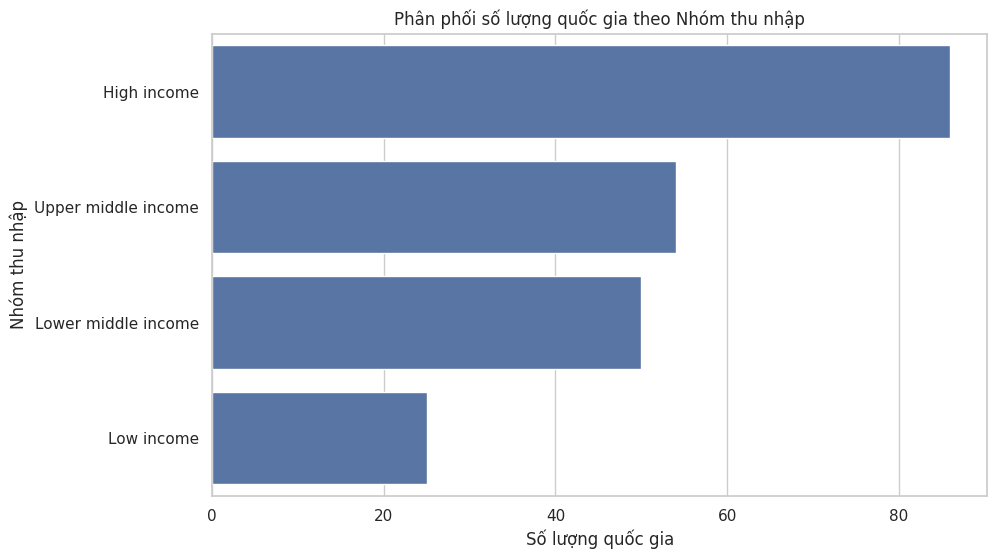

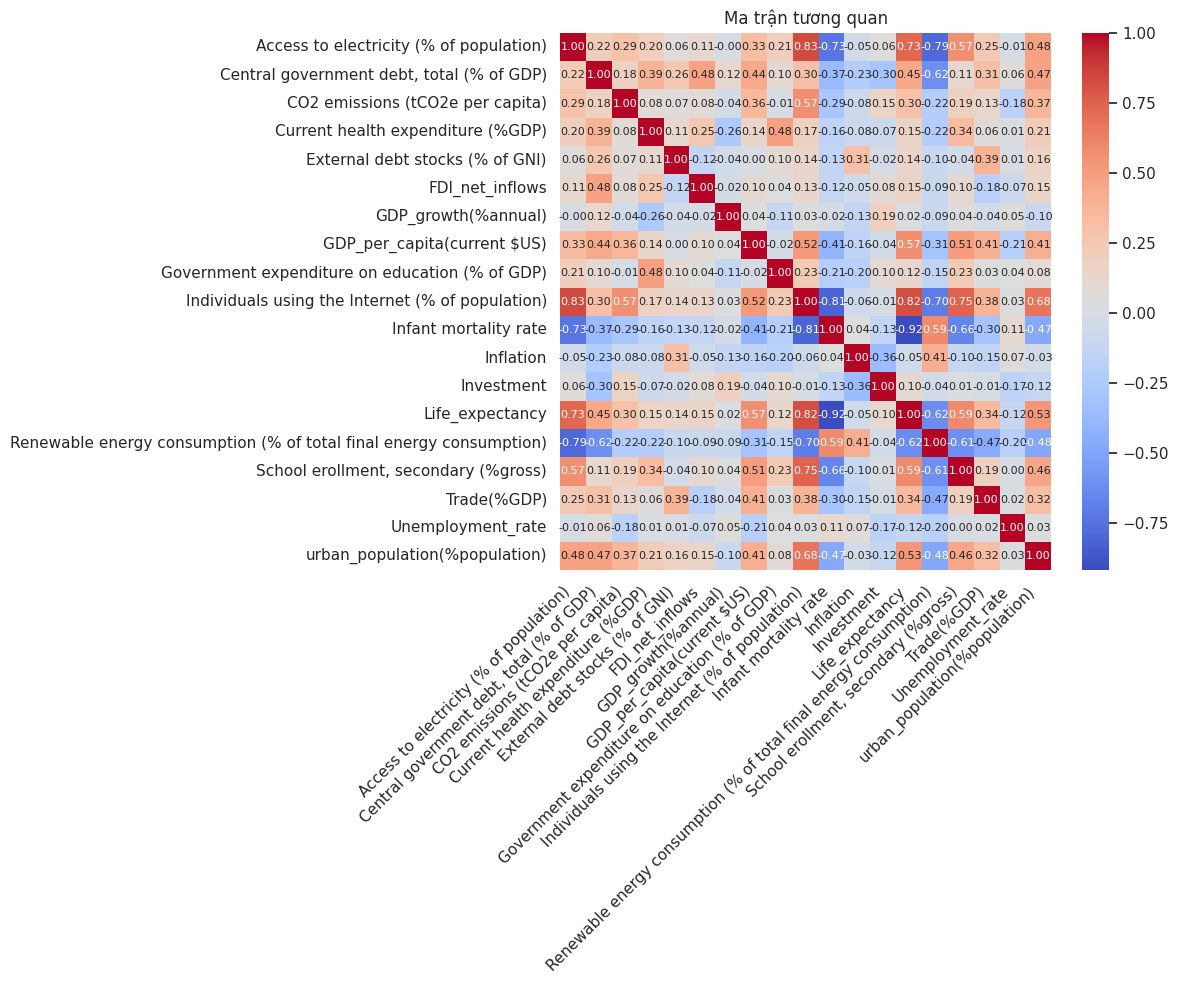


Vẽ biểu đồ Boxplot so sánh các biến theo nhóm thu nhập:


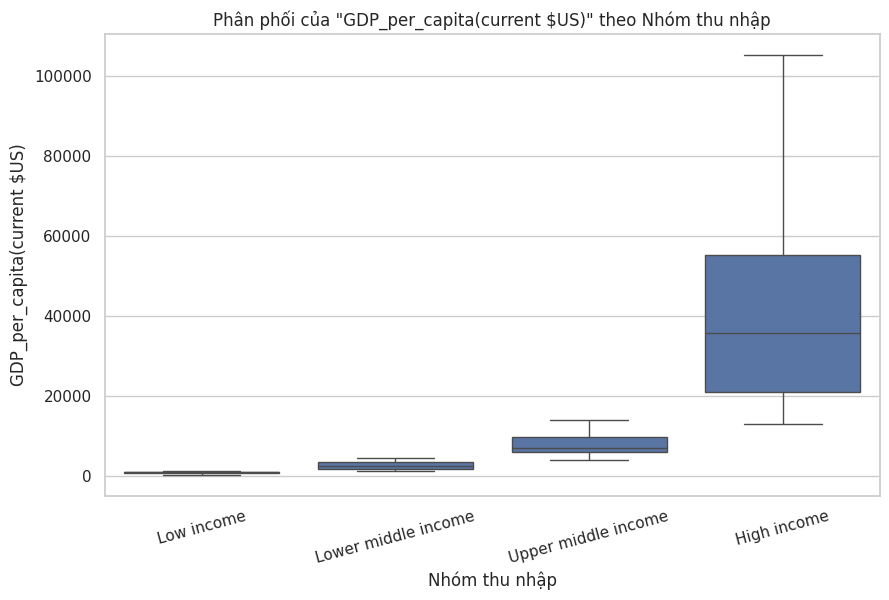

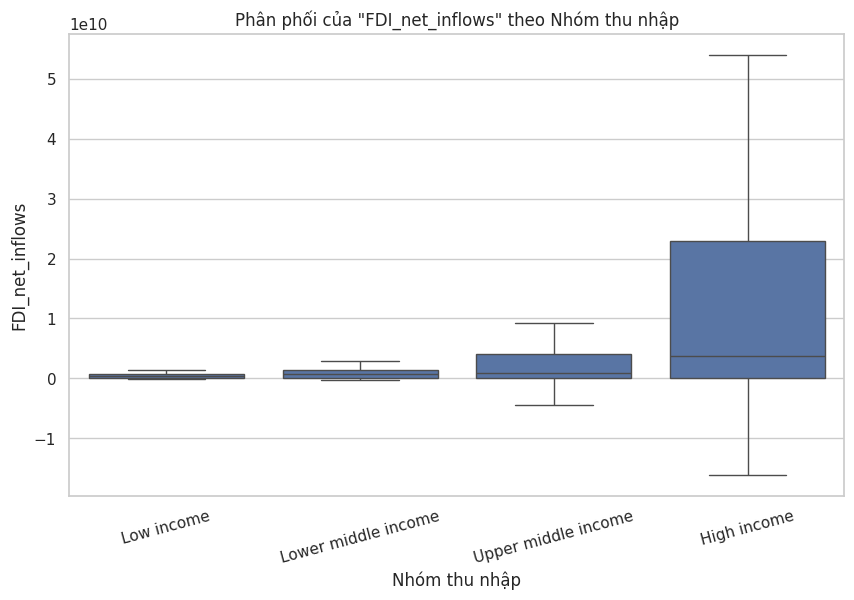

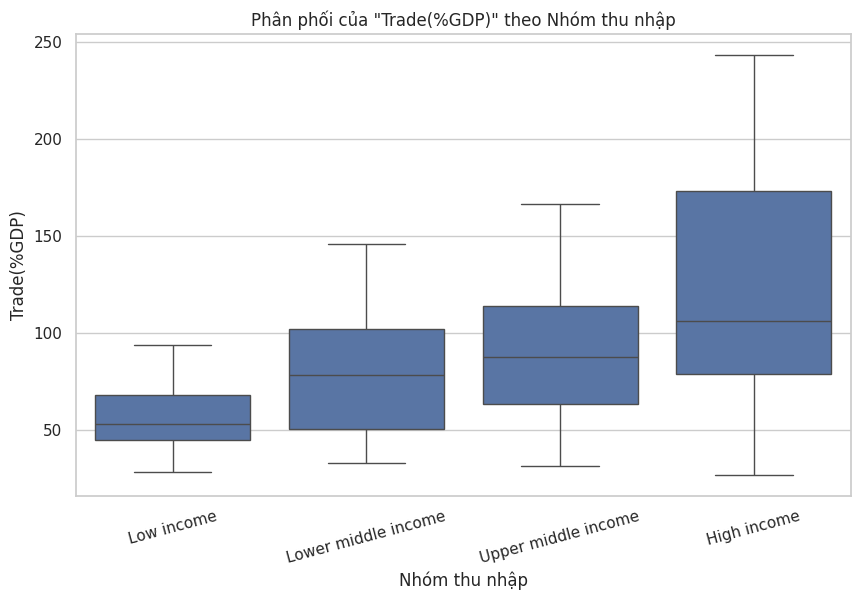

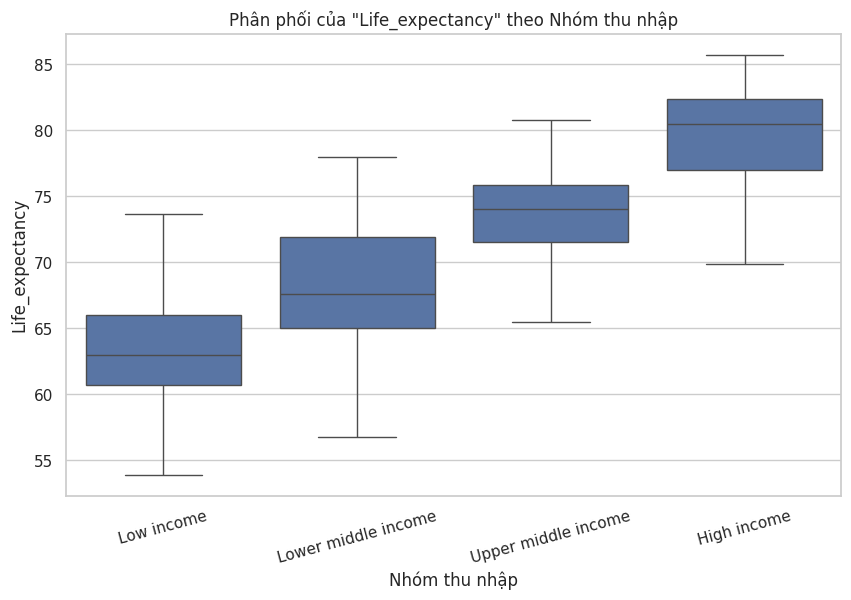

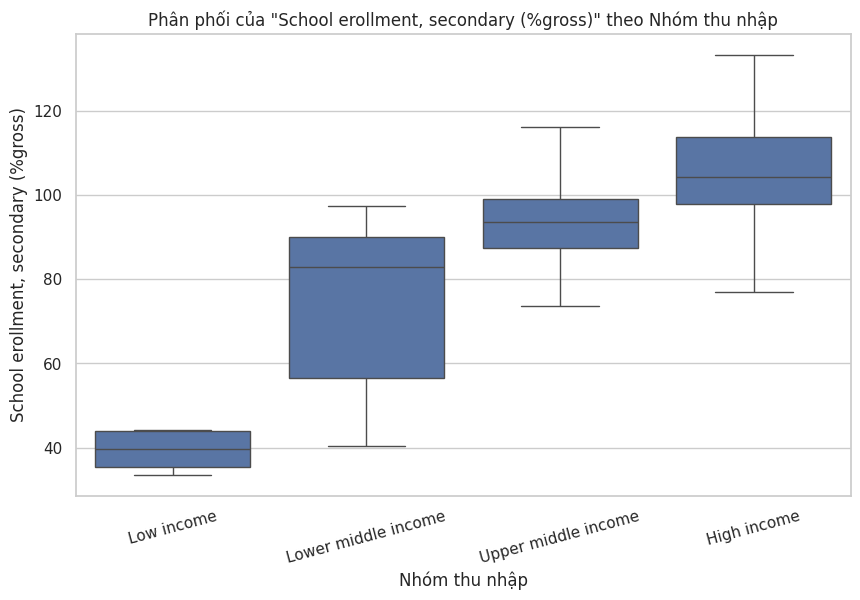

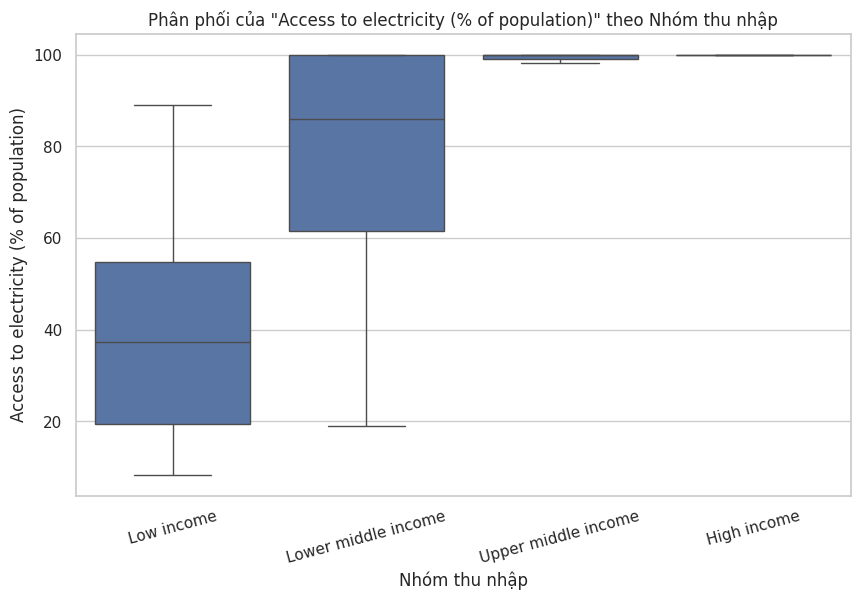

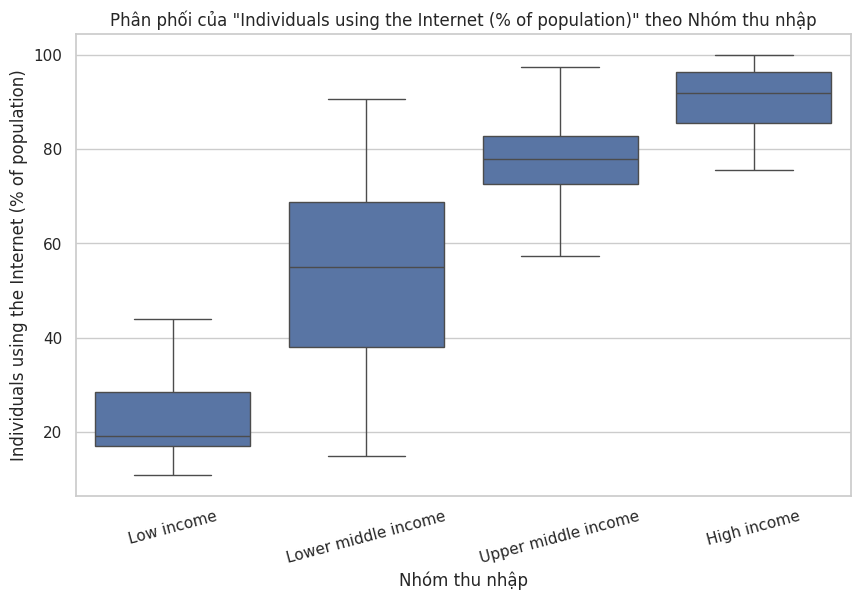

In [ ]:
# 1. Thống kê cơ bản
print("\nThống kê mô tả:")
display(df.describe().T.style.background_gradient(cmap = "magma"))

# 2. Phân phối của biến mục tiêu (Target)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Target', order=df['Target'].value_counts().index)
plt.title('Phân phối số lượng quốc gia theo Nhóm thu nhập')
plt.xlabel('Số lượng quốc gia')
plt.ylabel('Nhóm thu nhập')
plt.show()

# 3. Ma trận tương quan (Correlation Heatmap)
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Ma trận tương quan')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Biểu đồ Boxplot so sánh các nhóm
vars_to_plot = ['GDP_per_capita(current $US)',
                'FDI_net_inflows',
                'Trade(%GDP)',
                'Life_expectancy',
                'School erollment, secondary (%gross)',
                'Access to electricity (% of population)',
                'Individuals using the Internet (% of population)'
               ]

# Lọc các biến có tồn tại trong cột
vars_to_plot = [col for col in vars_to_plot if col in df.columns]

income_order = [
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]
print("\nVẽ biểu đồ Boxplot so sánh các biến theo nhóm thu nhập:")
for var in vars_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Target', y=var,order=income_order, showfliers=False)
    plt.title(f'Phân phối của "{var}" theo Nhóm thu nhập')
    plt.xlabel('Nhóm thu nhập')
    plt.ylabel(var)
    plt.xticks(rotation=15)
    plt.show()

**4. Xây dựng và đánh giá mô hình**

In [ ]:
# 1. Định nghĩa các mô hình
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 để dùng tất cả CPU
}

# 2. Vòng lặp huấn luyện và đánh giá
results = {}
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"\n--- Đang huấn luyện mô hình: {name} ---")

    # Huấn luyện mô hình trên dữ liệu đã được xử lý
    model.fit(X_train_processed, y_train)

    # Dự đoán trên tập test
    y_pred = model.predict(X_test_processed)

    # Đánh giá
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)

    results[name] = {'accuracy': accuracy, 'report': report, 'model': model}

    print(f"Độ chính xác (Accuracy): {accuracy:.4f}")
    print("Báo cáo phân loại (Classification Report):")
    print(report)

    # Lưu lại mô hình tốt nhất
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"\n=== Mô hình tốt nhất là: {best_model.__class__.__name__} với Accuracy = {best_accuracy:.4f} ===")


--- Bắt đầu Huấn luyện Mô hình ---

--- Đang huấn luyện mô hình: Logistic Regression ---
Độ chính xác (Accuracy): 0.6744
Báo cáo phân loại (Classification Report):
                     precision    recall  f1-score   support

        High income       1.00      0.76      0.87        17
         Low income       0.50      0.40      0.44         5
Lower middle income       0.50      0.60      0.55        10
Upper middle income       0.57      0.73      0.64        11

           accuracy                           0.67        43
          macro avg       0.64      0.62      0.62        43
       weighted avg       0.72      0.67      0.68        43


--- Đang huấn luyện mô hình: Decision Tree ---
Độ chính xác (Accuracy): 0.8605
Báo cáo phân loại (Classification Report):
                     precision    recall  f1-score   support

        High income       0.94      0.94      0.94        17
         Low income       1.00      0.60      0.75         5
Lower middle income       0.77      1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Độ chính xác (Accuracy): 0.9070
Báo cáo phân loại (Classification Report):
                     precision    recall  f1-score   support

        High income       1.00      0.88      0.94        17
         Low income       1.00      0.80      0.89         5
Lower middle income       0.83      1.00      0.91        10
Upper middle income       0.83      0.91      0.87        11

           accuracy                           0.91        43
          macro avg       0.92      0.90      0.90        43
       weighted avg       0.92      0.91      0.91        43


=== Mô hình tốt nhất là: RandomForestClassifier với Accuracy = 0.9070 ===


**5. Trực quan hóa kết quả mô hình**

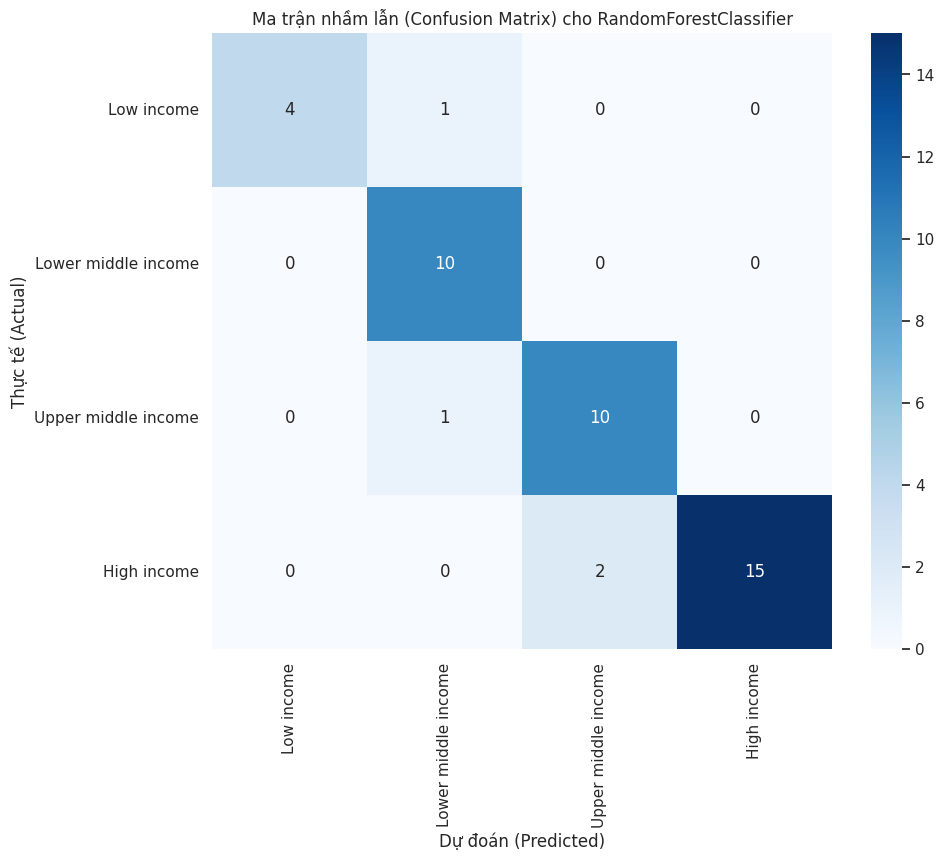

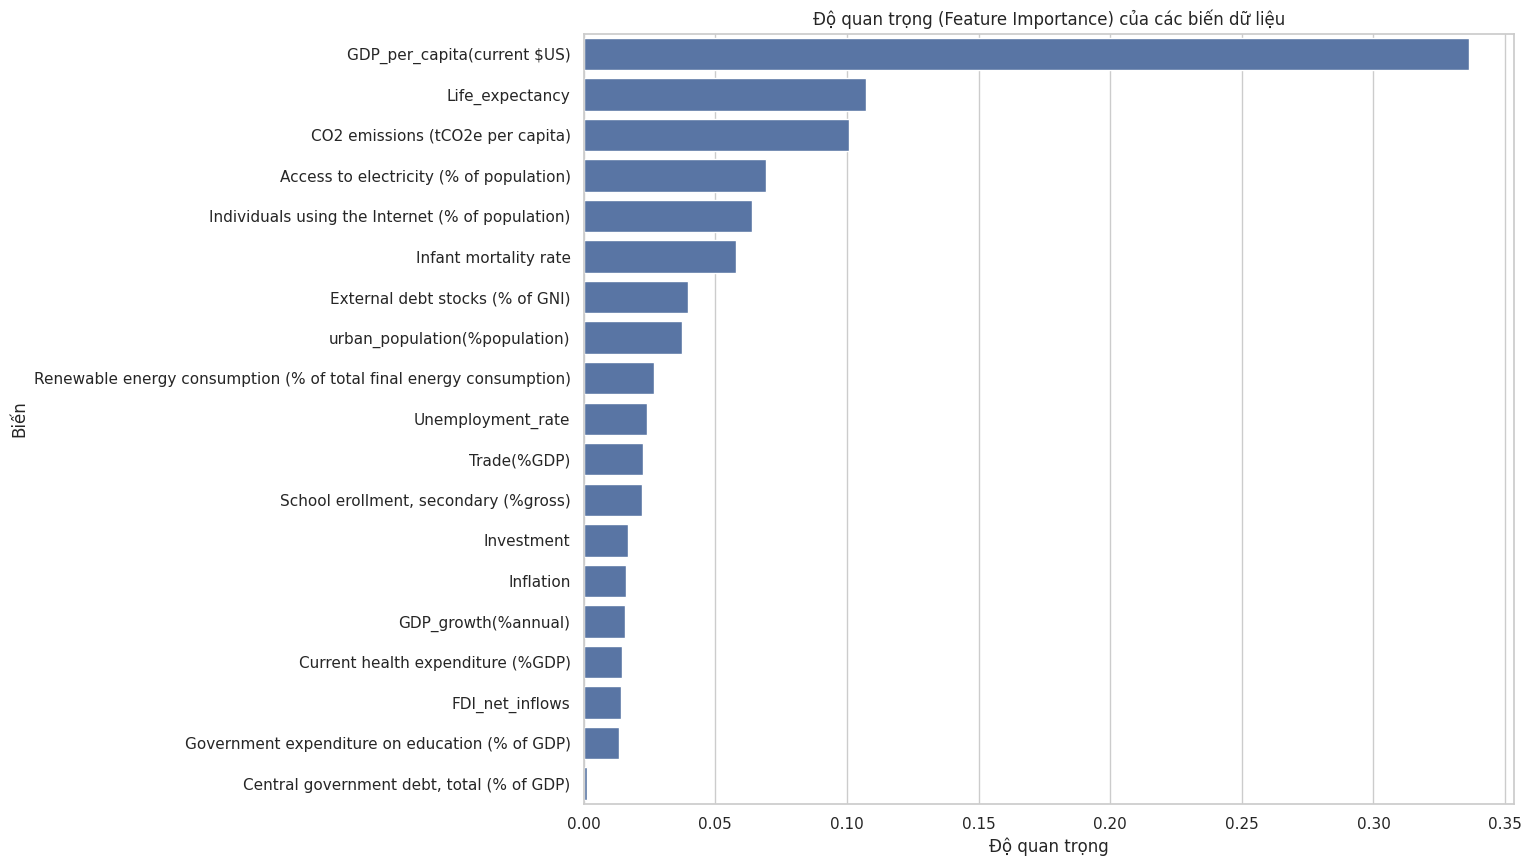

In [ ]:
# 1. Trực quan hóa Ma trận nhầm lẫn (Confusion Matrix)
# Dùng mô hình tốt nhất (best_model)
y_pred_best = best_model.predict(X_test_processed)

# Định nghĩa thứ tự lớp mới (1, 2, 3, 0)
new_class_order = [1, 2, 3, 0]
# Lấy tên lớp theo thứ tự mới
new_class_names = [le.classes_[i] for i in new_class_order]

# Tính lại ma trận nhầm lẫn với thứ tự lớp mới
cm = confusion_matrix(y_test, y_pred_best, labels=new_class_order)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=new_class_names,
            yticklabels=new_class_names)
plt.title(f'Ma trận nhầm lẫn (Confusion Matrix) cho {best_model.__class__.__name__}')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.show()

# 2. Trực quan hóa Độ quan trọng của Biến (Feature Importance)
# Chỉ áp dụng cho các mô hình Cây (Decision Tree, Random Forest)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_

    # Tạo DataFrame để trực quan
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Lấy top 20 biến quan trọng nhất
    top_20_features = feature_importance_df.head(20)

    plt.figure(figsize=(12, 10))
    sns.barplot(data=top_20_features, x='Importance', y='Feature')
    plt.title('Độ quan trọng (Feature Importance) của các biến dữ liệu')
    plt.xlabel('Độ quan trọng')
    plt.ylabel('Biến')
    plt.show()

In [ ]:
top_feature_names = feature_importance_df['Feature'].tolist()
print("Top feature names:")
print(top_feature_names)

Top feature names:
['GDP_per_capita(current $US)', 'Life_expectancy', 'CO2 emissions (tCO2e per capita)', 'Access to electricity (% of population)', 'Individuals using the Internet (% of population)', 'Infant mortality rate', 'External debt stocks (% of GNI)', 'urban_population(%population)', 'Renewable energy consumption (% of total final energy consumption)', 'Unemployment_rate', 'Trade(%GDP)', 'School erollment, secondary (%gross)', 'Investment', 'Inflation', 'GDP_growth(%annual)', 'Current health expenditure (%GDP)', 'FDI_net_inflows', 'Government expenditure on education (% of GDP)', 'Central government debt, total (% of GDP)']



Vẽ biểu đồ Boxplot so sánh các biến quan trọng theo nhóm thu nhập:


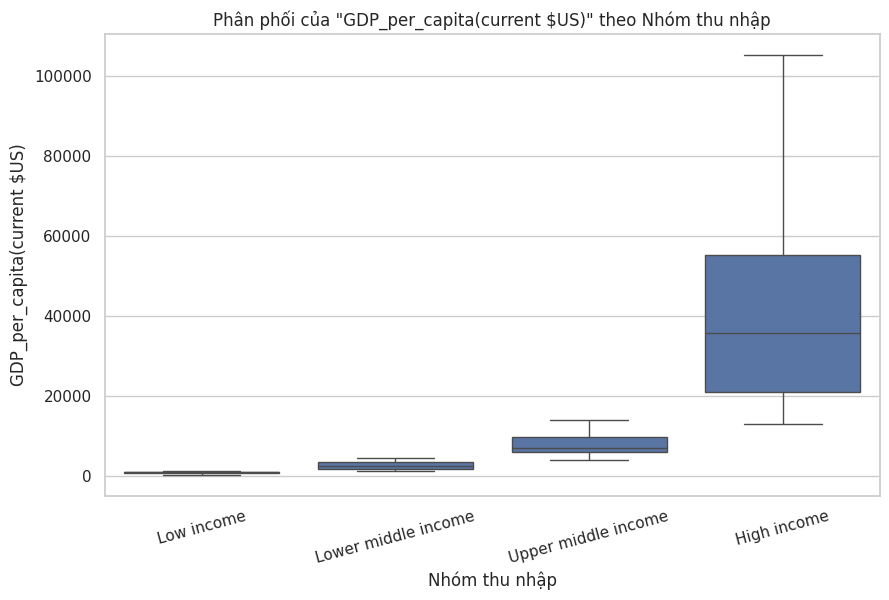

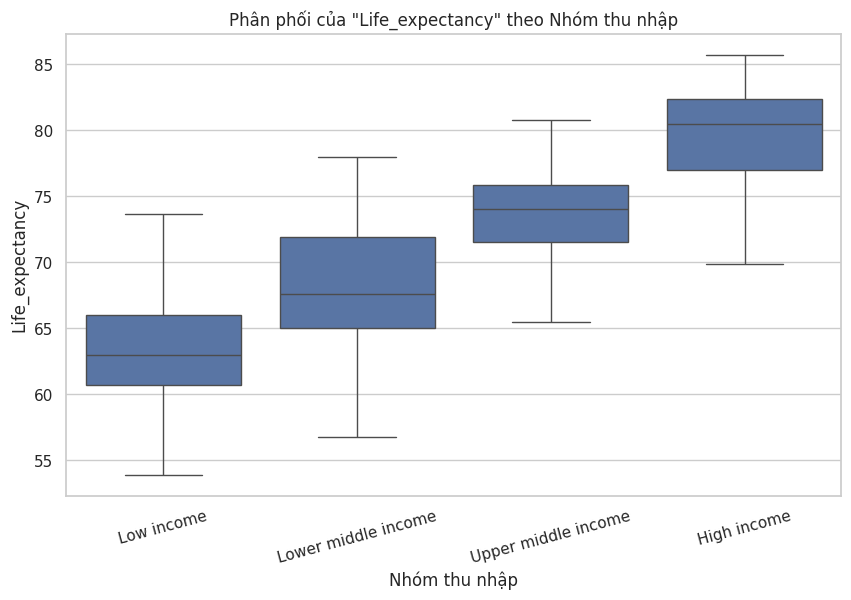

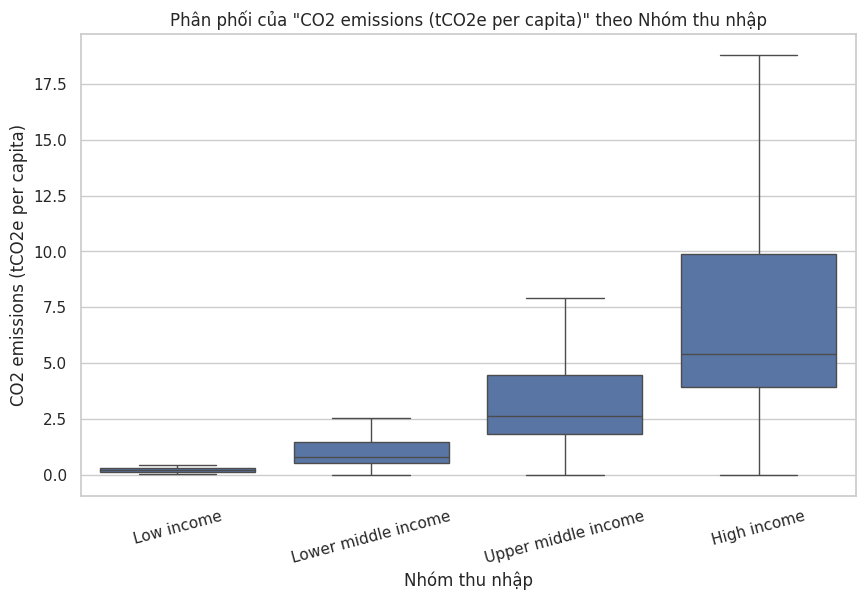

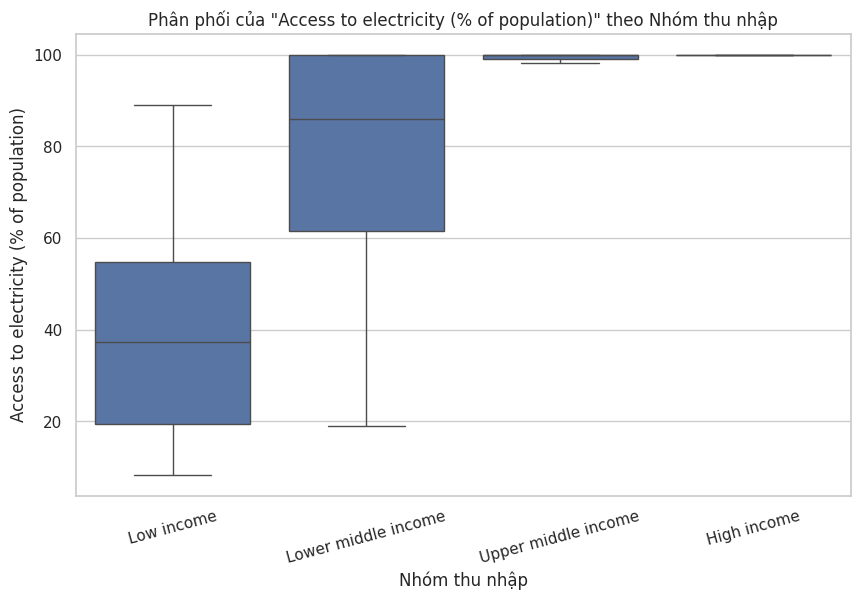

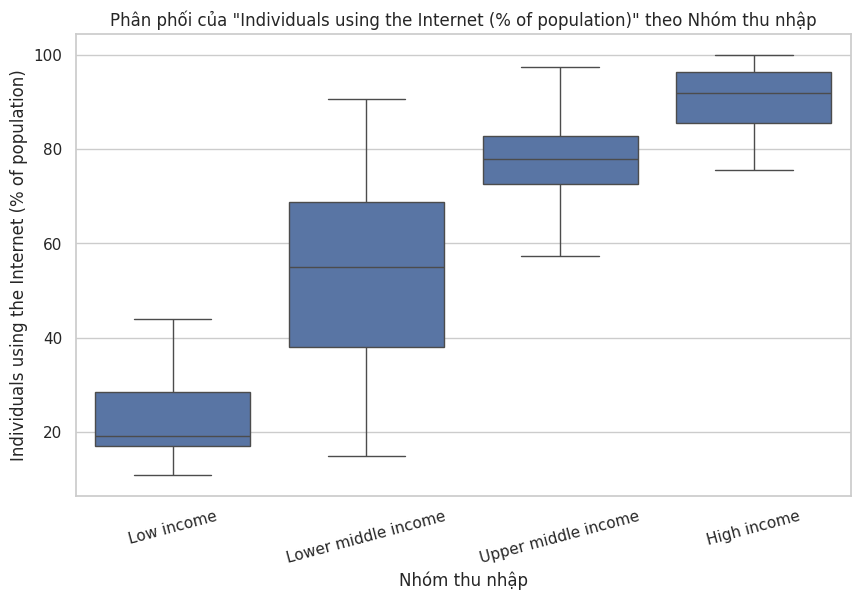

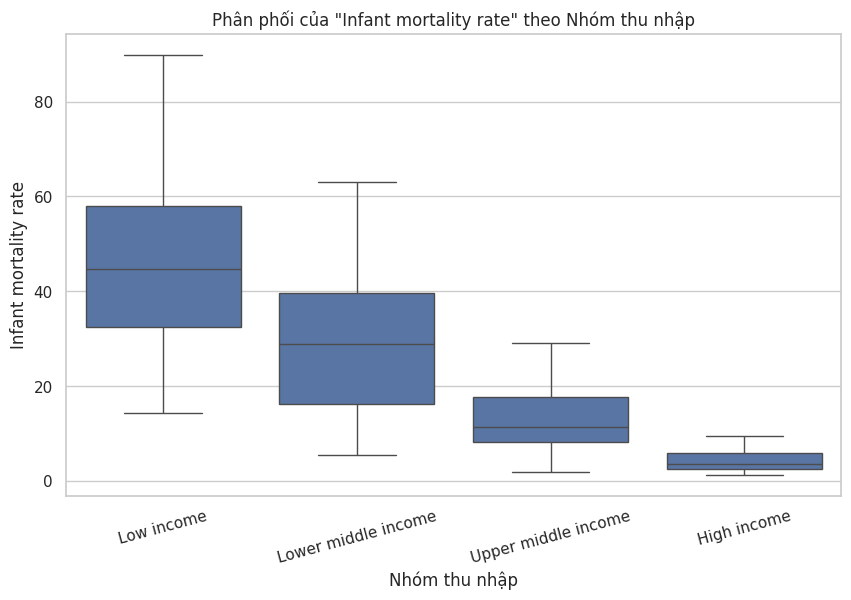

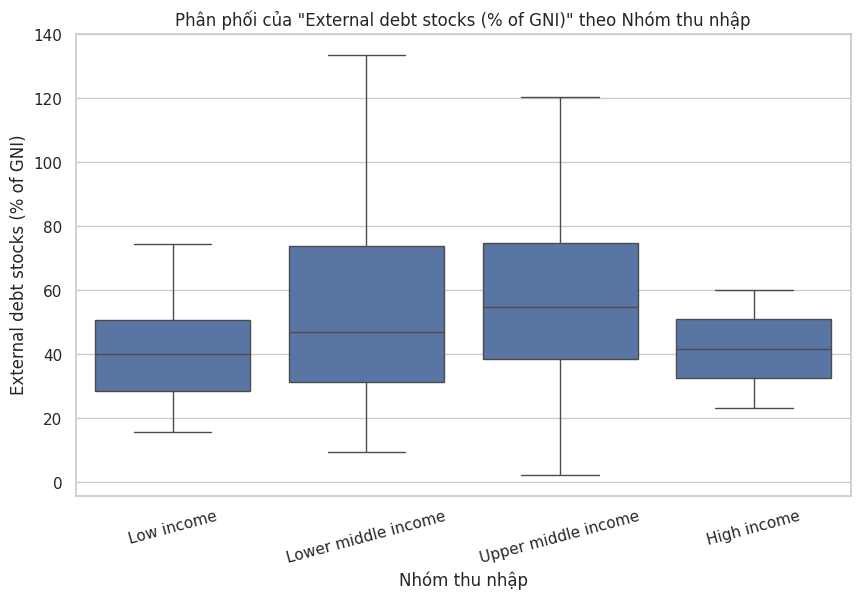

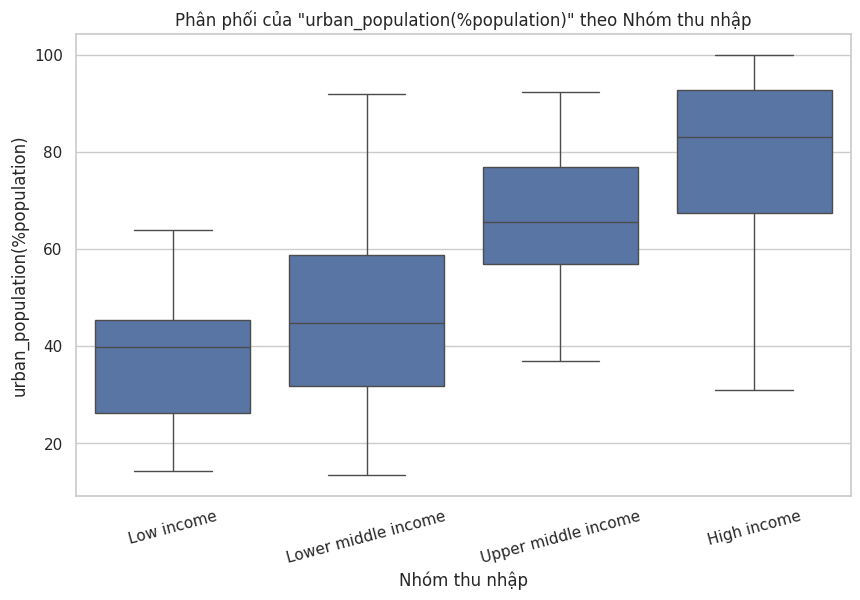

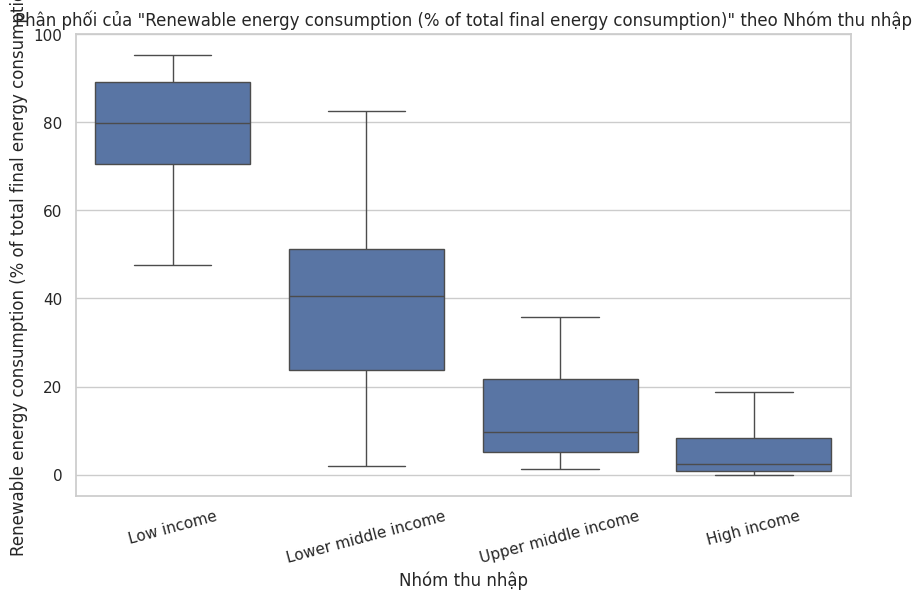

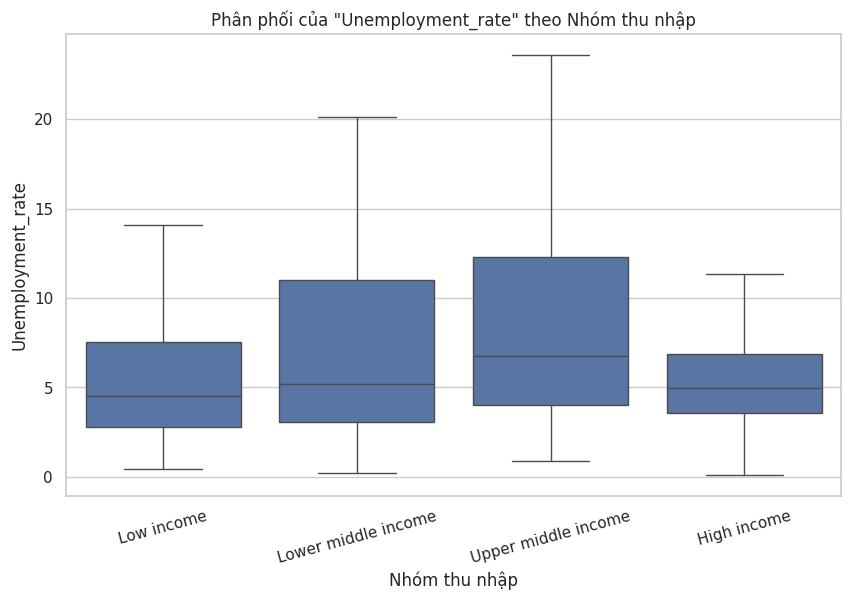

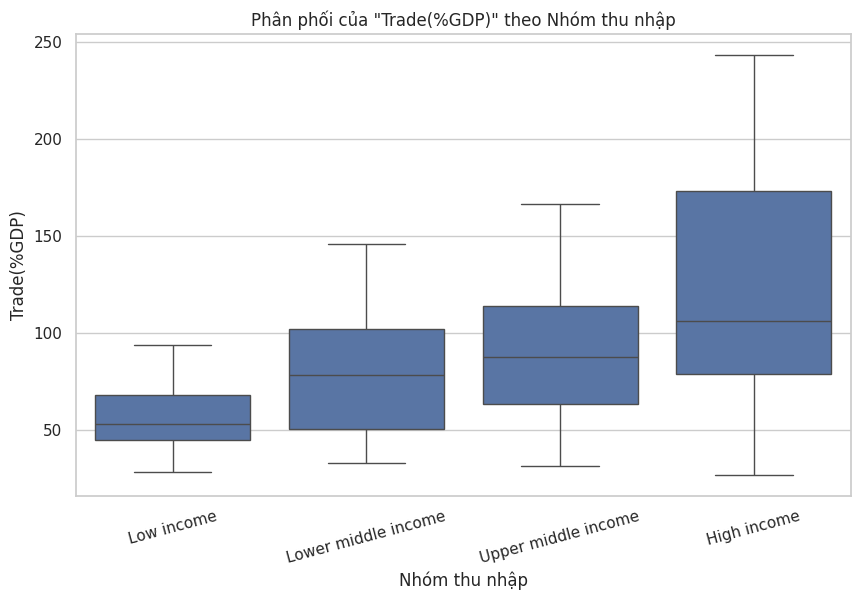

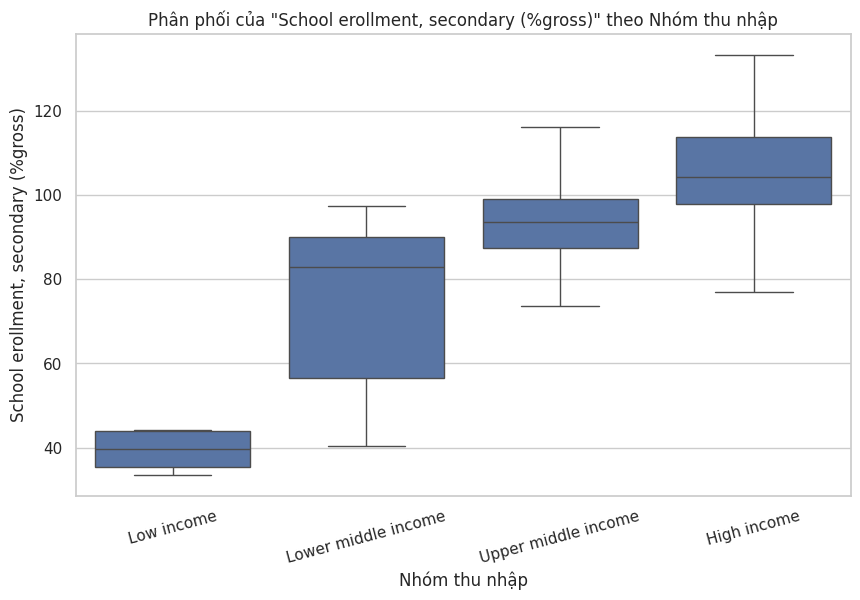

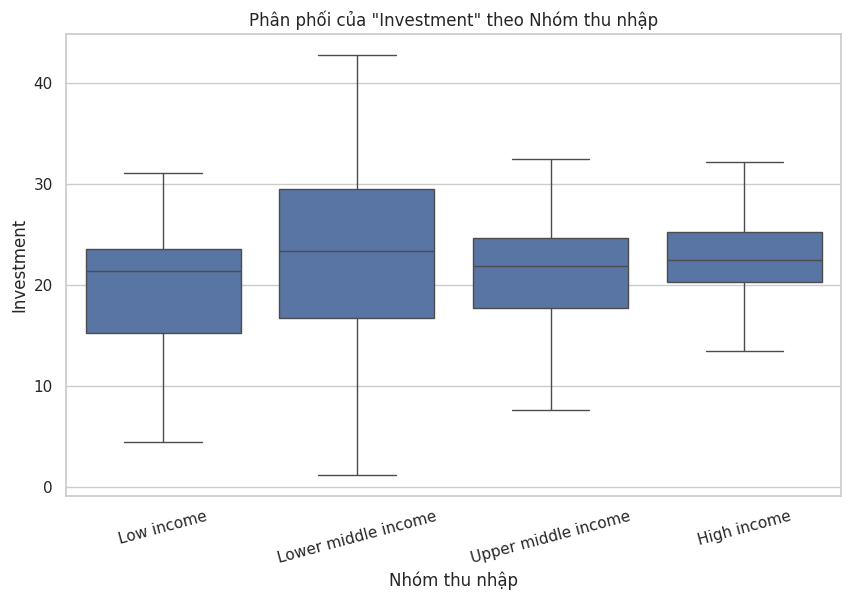

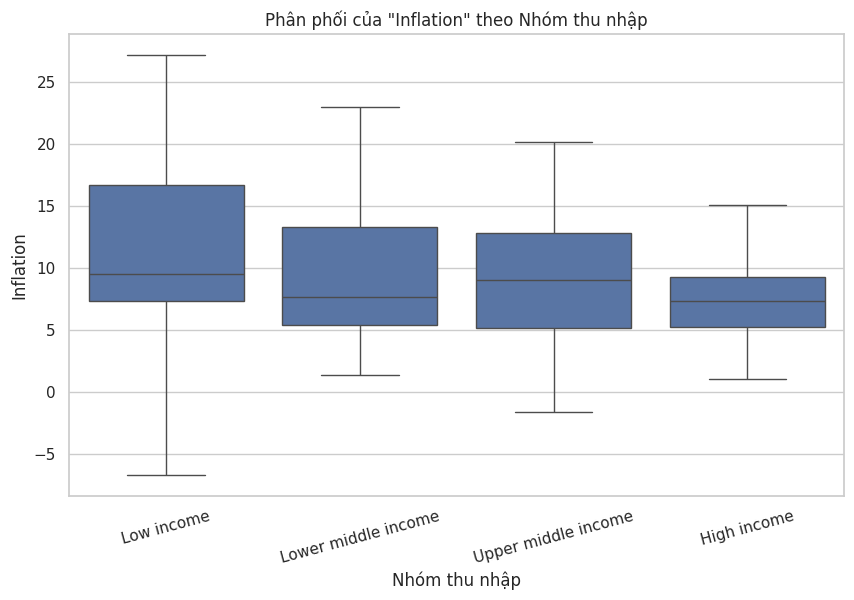

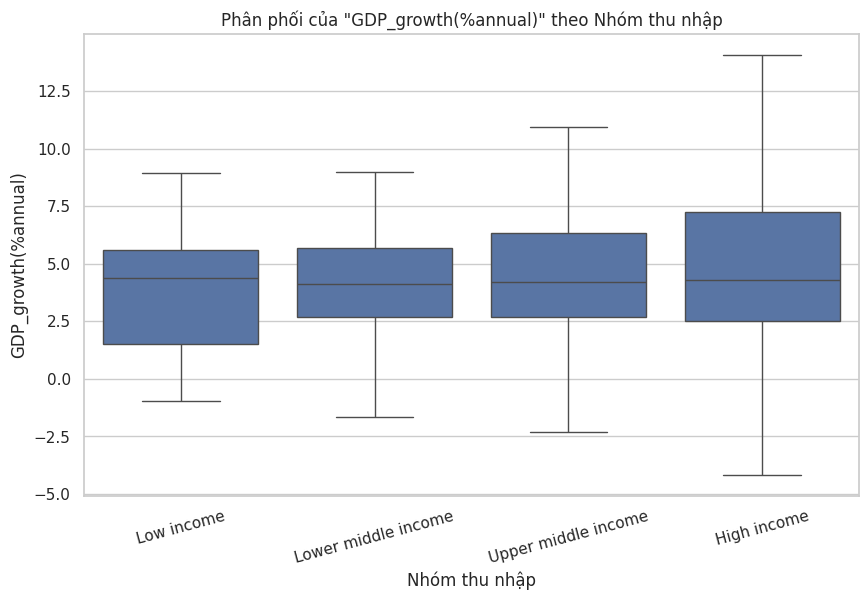

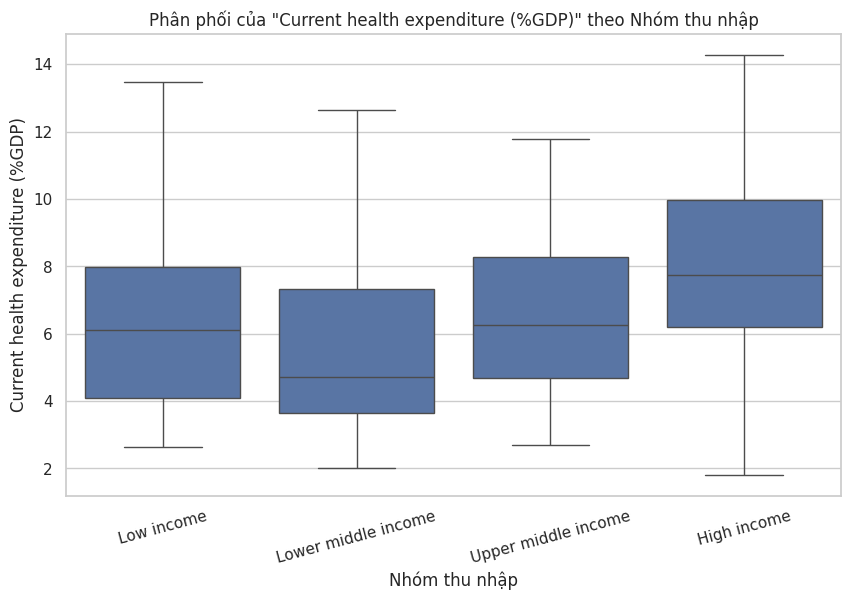

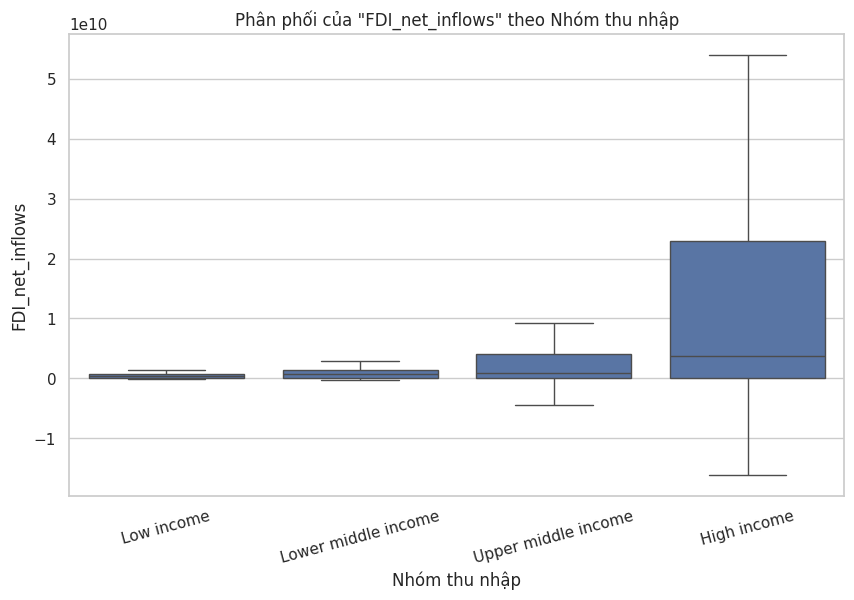

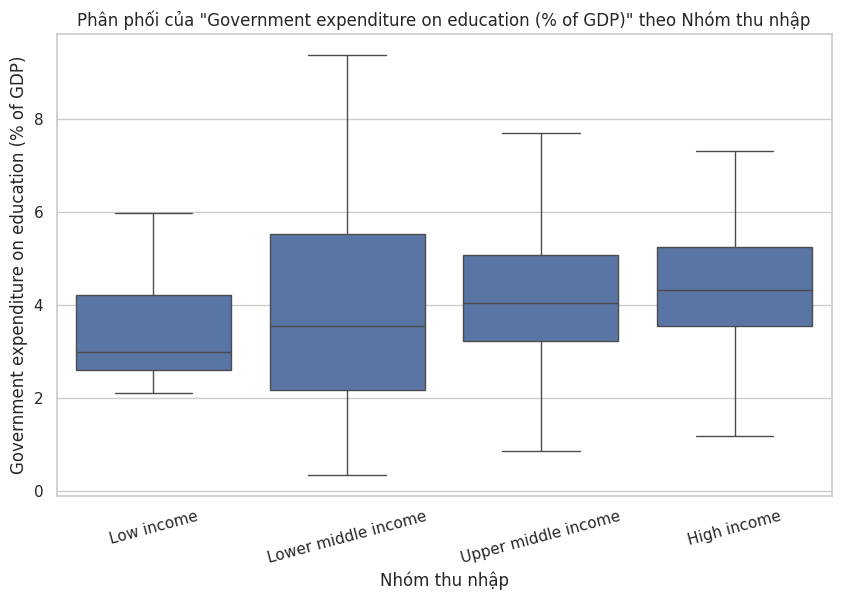

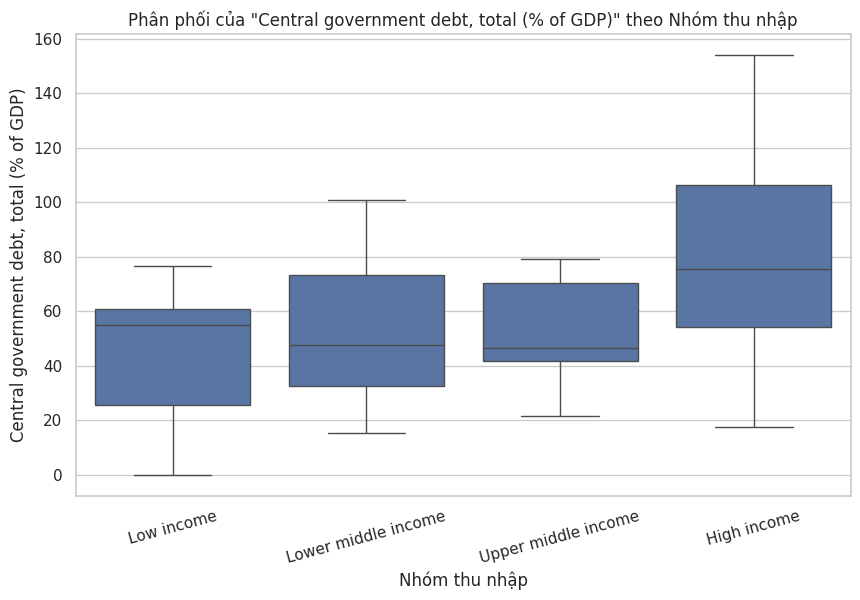

In [ ]:
# Define the desired order for income groups
income_order = [
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]

# Create box plots for each of the top features against the target
print("\nVẽ biểu đồ Boxplot so sánh các biến quan trọng theo nhóm thu nhập:")
for var in top_feature_names:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Target', y=var, order=income_order, showfliers=False)
    plt.title(f'Phân phối của "{var}" theo Nhóm thu nhập')
    plt.xlabel('Nhóm thu nhập')
    plt.ylabel(var)
    plt.xticks(rotation=15)
    plt.show()

**Giải thích về các Biểu đồ Boxplot và Độ quan trọng của biến**

Các biểu đồ Boxplot ở trên cho thấy phân phối của các biến quan trọng nhất (được xác định bởi mô hình Random Forest) theo các nhóm thu nhập khác nhau. Việc trực quan hóa này giúp chúng ta hiểu rõ hơn lý do tại sao một số biến lại quan trọng hơn những biến khác trong việc phân loại quốc gia vào các nhóm thu nhập.

Dưới đây là phân tích chi tiết cho từng biến quan trọng hàng đầu:

*   **GDP per capita (current $US)**: Biểu đồ cho thấy sự phân tách rất rõ ràng giữa các nhóm thu nhập. Median (đường kẻ ở giữa hộp) và phạm vi liên tứ phân vị (IQR - chiều cao của hộp) tăng lên đáng kể theo thứ tự từ 'Low income' đến 'High income'. Điều này hoàn toàn phù hợp với thực tế và giải thích tại sao GDP per capita có độ quan trọng cao nhất (quan sát từ biểu đồ Feature Importance trước đó). Các quốc gia có GDP per capita cao thường nằm trong nhóm thu nhập cao và ngược lại.

*   **Life Expectancy**: Có một xu hướng rõ ràng là tuổi thọ trung bình tăng lên khi nhóm thu nhập tăng lên. Biểu đồ cho thấy các hộp (IQR) dịch chuyển dần lên cao hơn từ nhóm thu nhập thấp đến nhóm thu nhập cao. Sự khác biệt về median giữa các nhóm là đáng kể, đặc biệt là giữa 'Low income' và 'High income'. Điều này cho thấy tuổi thọ là một chỉ báo mạnh mẽ về mức độ phát triển và chất lượng cuộc sống, tương quan chặt chẽ với thu nhập quốc gia. Độ quan trọng tương đối cao của biến này là điều dễ hiểu.

*   **CO2 emissions (tCO2e per capita)**: Mặc dù có sự chồng chéo nhất định, nhưng xu hướng chung là lượng khí thải CO2 bình quân đầu người tăng lên ở các quốc gia có thu nhập cao hơn. Các quốc gia thu nhập thấp có lượng khí thải rất thấp. Điều này phản ánh mức độ công nghiệp hóa và tiêu thụ năng lượng cao hơn ở các nước giàu. Biến này có độ quan trọng tương đối cao, cho thấy nó cũng góp phần phân biệt các nhóm thu nhập.

*   **Access to electricity (% of population)**: Tỷ lệ tiếp cận điện năng tăng mạnh từ nhóm thu nhập thấp đến nhóm thu nhập cao. Đặc biệt, nhóm 'High income' có tỷ lệ này rất gần 100%, trong đó các nhóm thu nhập thấp hơn có sự phân tán lớn hơn và median thấp hơn đáng kể. Khả năng tiếp cận điện năng là một yếu tố cơ bản cho phát triển kinh tế và xã hội, do đó, mối tương quan mạnh mẽ này giải thích độ quan trọng của biến.

*   **Individuals using the Internet (% of population)**: Tương tự như tiếp cận điện năng, tỷ lệ người sử dụng internet cũng tăng lên đáng kể theo nhóm thu nhập. Các quốc gia thu nhập cao có tỷ lệ sử dụng internet rất cao, trong khi các quốc gia thu nhập thấp có tỷ lệ thấp và phân phối rộng hơn. Điều này phản ánh sự phát triển công nghệ và kết nối số, là đặc trưng của các nền kinh tế phát triển. Độ quan trọng của biến này phản ánh khả năng phân biệt các nhóm dựa trên mức độ số hóa.

*   **Infant mortality rate**: Tỷ lệ tử vong trẻ sơ sinh có xu hướng giảm mạnh khi nhóm thu nhập tăng lên. Các quốc gia thu nhập thấp có tỷ lệ tử vong trẻ sơ sinh rất cao và phân tán rộng, trong đó các quốc gia thu nhập cao có tỷ lệ rất thấp và ít biến động. Tỷ lệ tử vong trẻ sơ sinh là một chỉ báo quan trọng về hệ thống y tế, dinh dưỡng và điều kiện sống, tất cả đều liên quan chặt chẽ đến mức độ giàu có của quốc gia. Mối quan hệ nghịch đảo mạnh mẽ này giải thích tại sao biến này có độ quan trọng cao.

*   **External debt stocks (% of GNI)**: Biến này cho thấy xu hướng phức tạp hơn. Mặc dù các quốc gia thu nhập thấp có thể có tỷ lệ nợ cao, nhưng các quốc gia thu nhập trung bình (đặc biệt là 'Upper middle income') cũng có thể có tỷ lệ nợ đáng kể. Nhóm thu nhập cao có vẻ có tỷ lệ nợ tương đối thấp hơn. Sự phân phối có vẻ ít rõ ràng hơn so với các biến như GDP hay Tuổi thọ, điều này có thể giải thích độ quan trọng thấp hơn của biến này so với các biến hàng đầu.

*   **Urban population (% population)**: Tỷ lệ dân số thành thị có xu hướng tăng nhẹ khi nhóm thu nhập tăng lên, đặc biệt là giữa nhóm thu nhập thấp và các nhóm cao hơn. Các quốc gia thu nhập cao thường có tỷ lệ đô thị hóa cao hơn. Tuy nhiên, sự phân tách giữa các nhóm không quá rõ ràng như GDP hoặc Tuổi thọ, phản ánh trong độ quan trọng thấp hơn.

**Kết luận:**

Các biểu đồ boxplot xác nhận rằng các biến được mô hình Random Forest xác định là quan trọng nhất thực sự có sự khác biệt đáng kể về phân phối giữa các nhóm thu nhập. Các biến như GDP per capita, Life Expectancy, Access to electricity, Individuals using the Internet và Infant mortality rate cho thấy sự phân tách rõ ràng nhất giữa các nhóm, điều này giải thích tại sao chúng có độ quan trọng cao trong mô hình phân loại. Ngược lại, các biến có độ quan trọng thấp hơn (như Central government debt) cho thấy sự phân phối ít rõ ràng hơn hoặc chồng chéo nhiều hơn giữa các nhóm thu nhập. Việc trực quan hóa này giúp củng cố sự hiểu biết của chúng ta về các yếu tố kinh tế và xã hội nào là động lực chính đằng sau việc phân loại quốc gia theo nhóm thu nhập.